      score/len  best_score  seq_len                    pdb_name
2774 -11.554224 -670.145020     58.0  relax_run2_188_000003_0004
2131 -11.589580 -579.479004     50.0  relax_run2_154_000013_0003
1599 -12.446930 -709.474976     57.0   relax_run2_13_000008_0002
5118 -12.491233 -749.473999     60.0   relax_run2_83_000017_0005
2974 -12.499567 -749.973999     60.0  relax_run2_196_000019_0002
...         ...         ...      ...                         ...
4987 -19.774375 -790.974976     40.0   relax_run2_73_000003_0005
1111 -19.806825 -792.273010     40.0  relax_run2_105_000007_0003
1441 -19.878350 -795.133972     40.0   relax_run2_12_000010_0004
1342 -20.022150 -800.885986     40.0  relax_run2_115_000011_0003
2877  -5.470767 -328.246002     60.0  relax_run2_192_000011_0004

[5389 rows x 4 columns]
      score/len  best_score  seq_len                    pdb_name
4866 -10.408160 -780.612000     75.0   relax_run2_73_000001_0003
12   -10.490514 -776.297974     74.0        relax_10_000037_0003


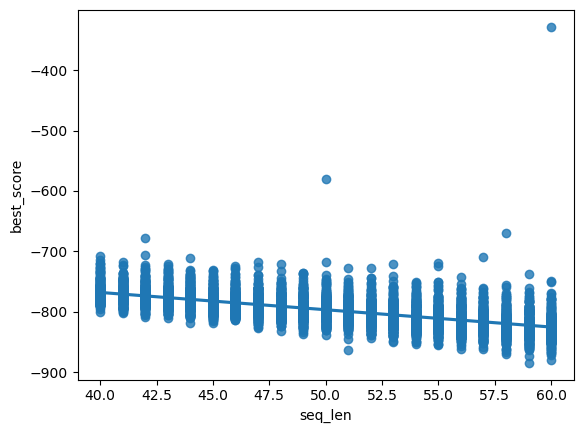

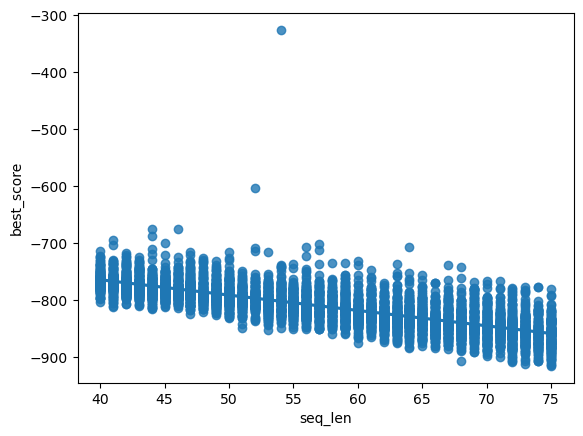

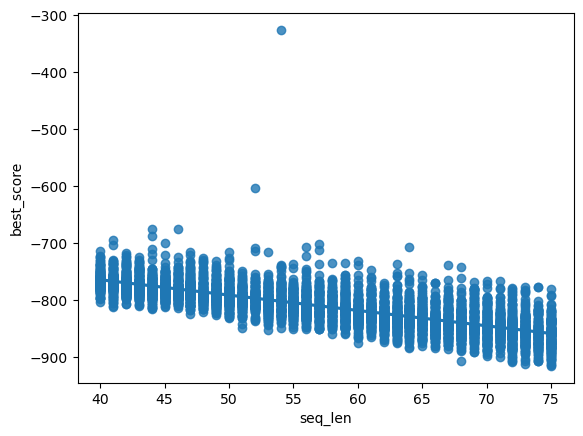

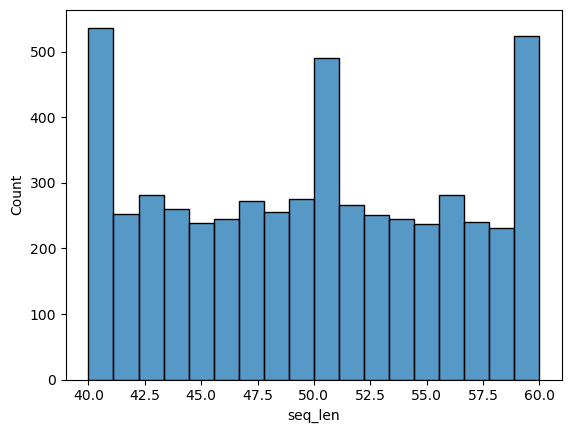

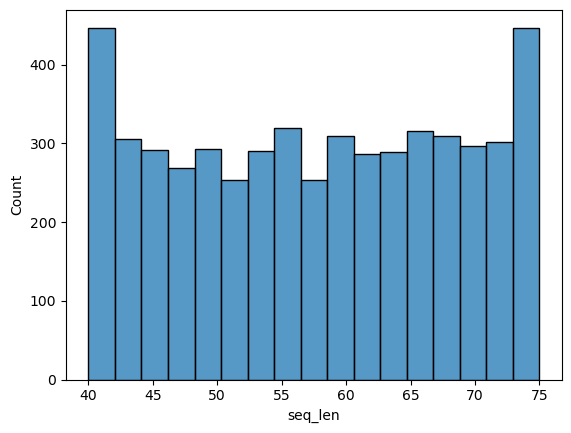

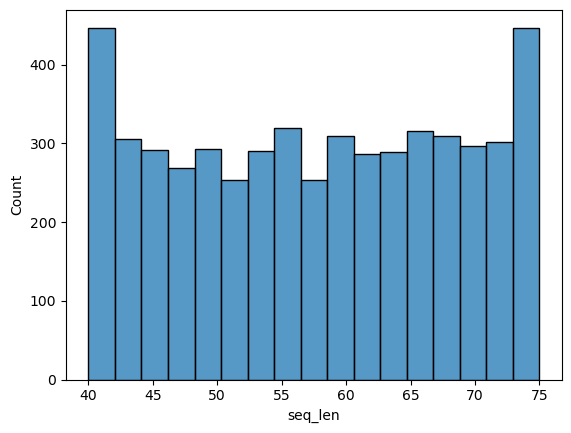

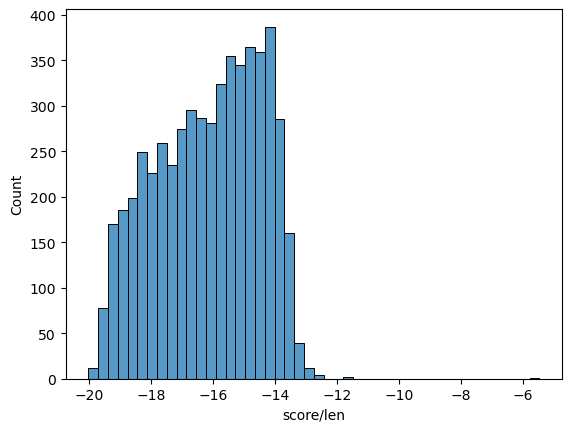

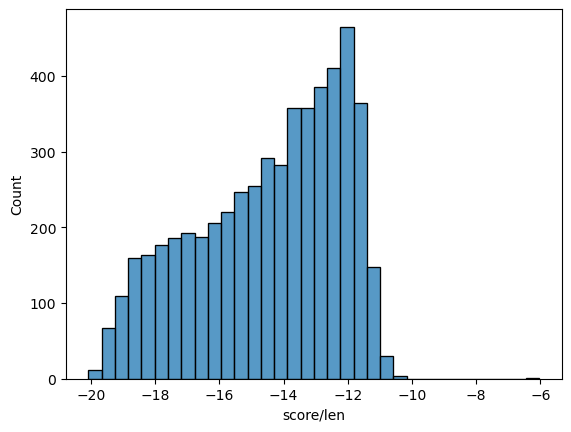

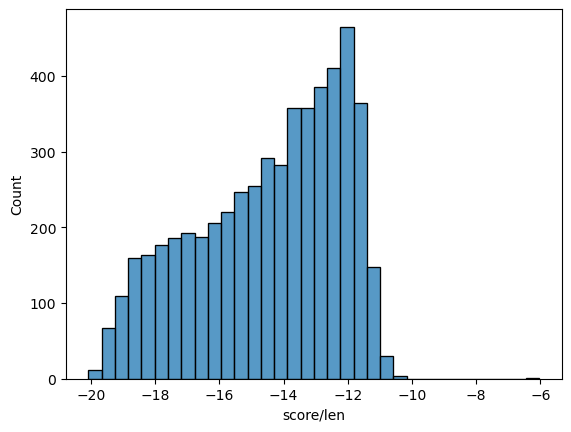

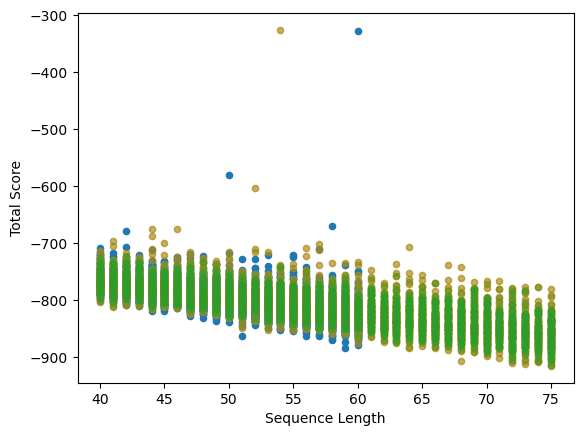

In [52]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def sort_csv(csv_file):
    df = pd.read_csv(csv_file)
    sorted_df = df.sort_values(by="score/len", ascending=True)
    sorted_df["score/len"] = pd.to_numeric(sorted_df["score/len"], downcast="float", errors="coerce")
    sorted_df["seq_len"] = pd.to_numeric(sorted_df["seq_len"], downcast="float", errors="coerce")
    sorted_df["best_score"] = pd.to_numeric(sorted_df["best_score"], downcast="float", errors="coerce")
    sorted_df = sorted_df[sorted_df["score/len"]<0]
    sorted_df = sorted_df[sorted_df["score/len"]>-40]
    print(sorted_df)
    return sorted_df

def score_vs_length(sorted_df):
    plt.figure()
    scatter = sns.regplot(x=sorted_df["seq_len"], y=sorted_df["best_score"])

def seq_len_histo(sorted_df):
    plt.figure()
    seq_len_histogram = sns.histplot(x=sorted_df["seq_len"])
    
def average_score_histogram(sorted_df):
    plt.figure()
    histogram = sns.histplot(x=sorted_df["score/len"].dropna())

paula_output = sort_csv('./post_relax_data_paula_output.csv') 
paula_output2 = sort_csv('./post_relax_data_paula_output2.csv')
paula_output3 = sort_csv('./post_relax_data_paula_output2.csv')

score_vs_length(paula_output)
score_vs_length(paula_output2)
score_vs_length(paula_output3)
seq_len_histo(paula_output)
seq_len_histo(paula_output2)
seq_len_histo(paula_output3)
average_score_histogram(paula_output)
average_score_histogram(paula_output2)
average_score_histogram(paula_output3)

plt.figure().clear()
plt.scatter(paula_output["seq_len"], paula_output["best_score"], alpha = 1, linewidths= 1, s = 20)
plt.scatter(paula_output2["seq_len"], paula_output2["best_score"], alpha = 0.6, linewidths= 1, s = 20)
plt.scatter(paula_output3["seq_len"], paula_output3["best_score"], alpha = 0.25, linewidths= 1, s = 20)
plt.xlabel("Sequence Length")
plt.ylabel("Total Score")
plt.show()
